# TSA filter

In [1]:
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft
from scipy import signal
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from numpy import fft as npfft
import pylab as pl
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
path = 'data_zero.csv'
df=pd.read_csv(path)
columns_names = df.columns
df.index = pd.to_datetime(df[columns_names[0]]/1000, unit='s')
# df.drop(columns[0], axis = 1)
delite_column = columns_names[0]
df = df.drop(delite_column, axis = 1) 
# df.sort_index(inplace= True)
df.sort_index(inplace= True)
speed = 10
dfx = df[::speed]
# dfx=df

In [3]:
def taking_of_nan_values_DF(dfx):
    # interpolation
    dfx = dfx.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    dfx = dfx.fillna(method='ffill')
    dfx = dfx.fillna(method='bfill')
    return dfx

In [4]:
def TSA_trend_compare(df_TSA):
    from statsmodels.tsa.filters.hp_filter import hpfilter
    from datetime import datetime, timedelta
    columns_names_TSA = df_TSA.columns     
    for column_TSA in columns_names_TSA:
        gdp_cycle, gdp_trend = hpfilter(df_TSA[column_TSA], lamb=1000000)
        trend_name = 'trend'+ column_TSA
        df_TSA[trend_name] = gdp_trend
        df_TSA[[column_TSA, trend_name]][:].plot(figsize=(20,6)).autoscale(axis='x',tight=True)
        plt.title('TSA filters ' + column_TSA, size=16)
        plt.xlabel('time')
        plt.ylabel('Value')
        plt.show()

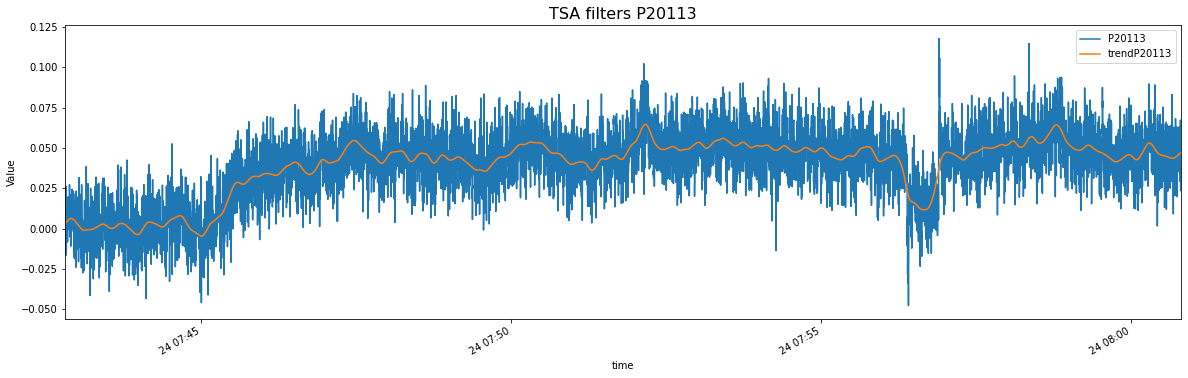

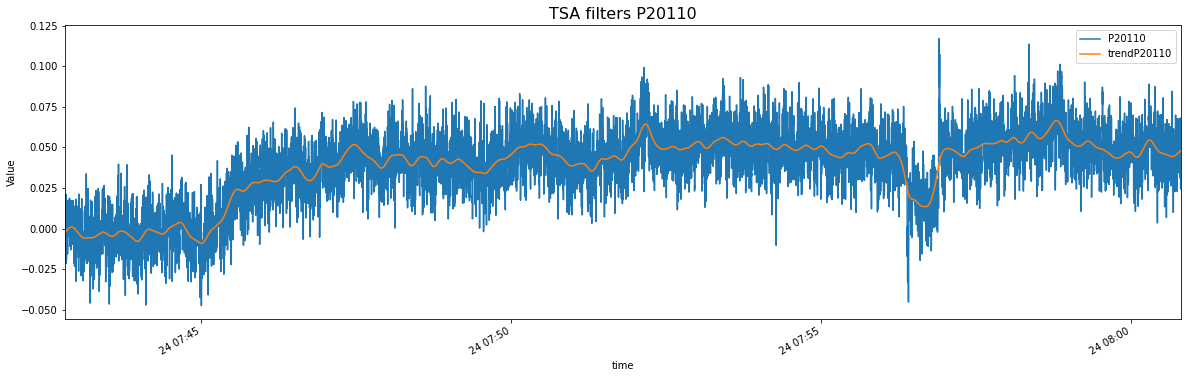

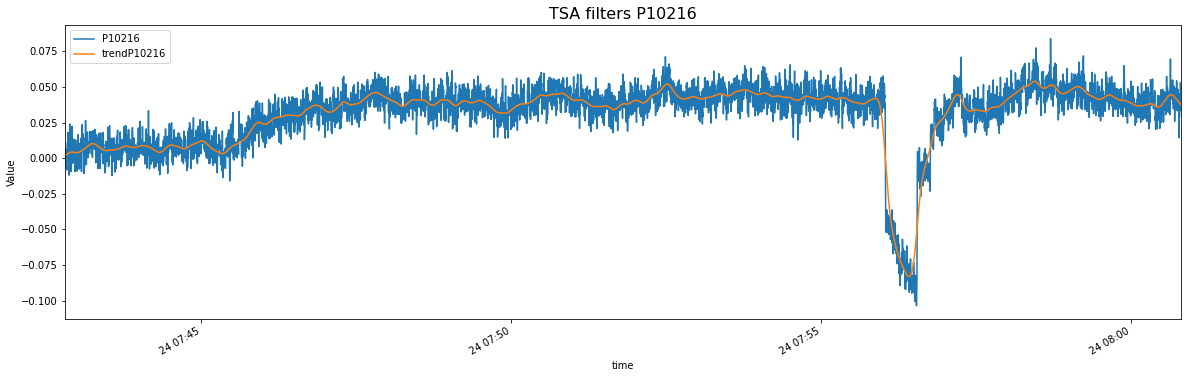

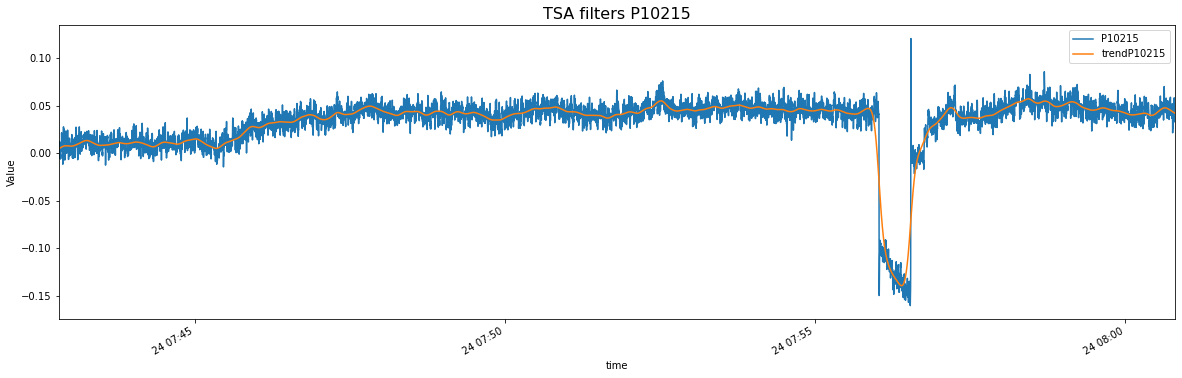

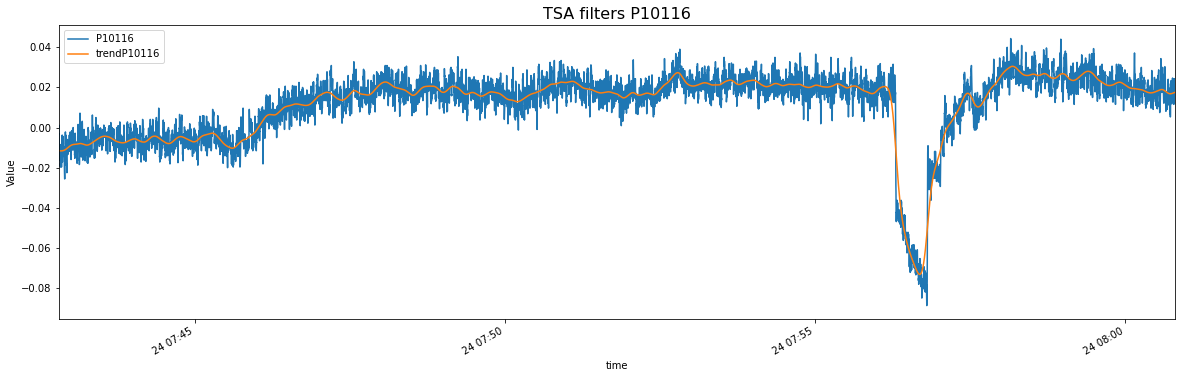

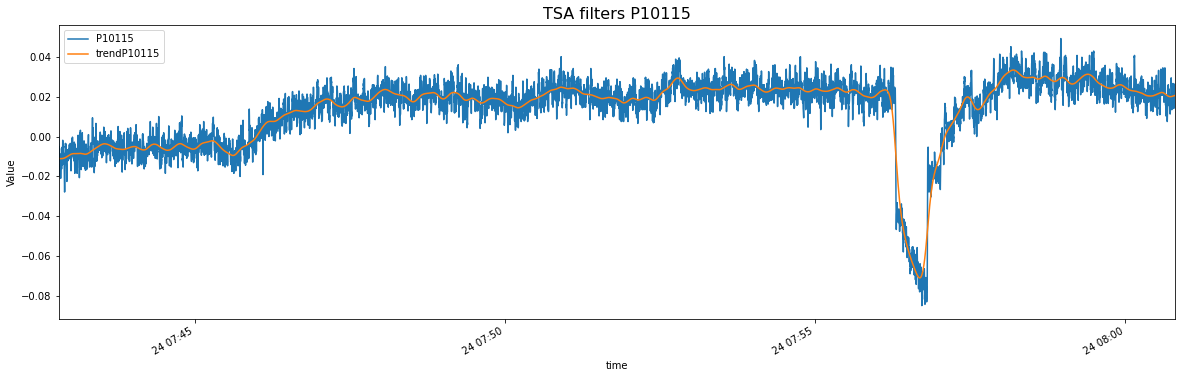

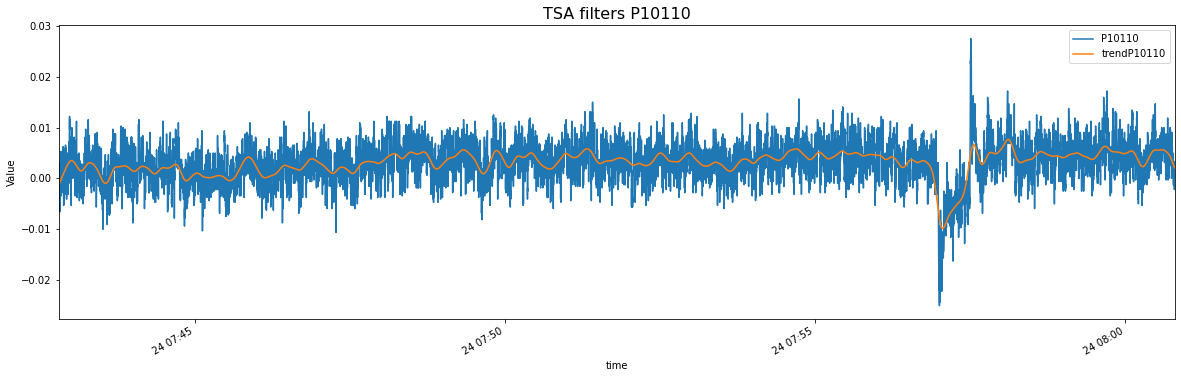

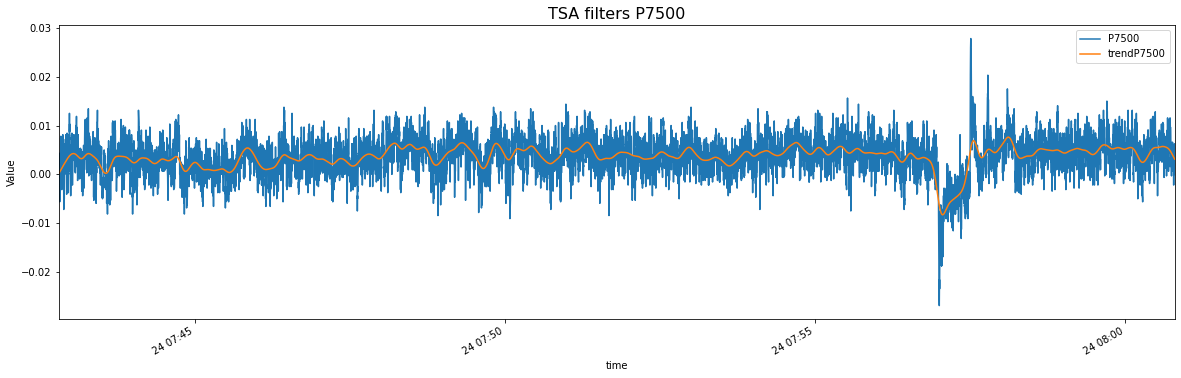

In [5]:
df_TSA = dfx
TSA_trend_compare(df_TSA )